In [1]:
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from sklearn.model_selection import KFold

In [2]:
# Kontrola, aky na akom backende je keras library zalozena - je to tensorflow
keras.backend.backend()

'tensorflow'

In [3]:
# Importujeme si nas fashion dataset priamo z keras datasetov
# (kedze keras priamo disponuje tymto datasetom)
from keras.datasets import fashion_mnist

In [4]:
# Metoda load_data() vrati dvojicu (x_train, y_train) a (x_test, y_test), kde
# x_train a x_test su polia, ktore obsahuju data ciernobielych obrazkov s
# tvarom (shape) - (pocet_obrazkov, 28, 28), kde 28 a 28 je pocet pixelov
# na obrazok -> 1 obrazok ma 28x28 pixelov

# y_train a y_test su polia oznaceni / labelov od 0 po 9, ktore symbolizuju
# typ konkretneho oblecenia. Napr. 0 - tricko, 1 - nohavice, 2 - pulover, ...
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [5]:
# Cize trenovacia mnozina podla modelu vyssie obsahuje 60000 obrazkov / mnozin
# pixelov, kde kazdy obrazok ma vysku 28px a sirku 28px
x_train.shape

(60000, 28, 28)

In [6]:
# Tu vidime, ze mnozina, na ktorej budeme testovat / predikovat / klasifikovat
# nazov alebo typ oblecenia podla daneho obrazku obsahuje
# 10000 obrazkov / mnozin pixelov, kazdy s vyskou 28px a sirkou 28px
x_test.shape

(10000, 28, 28)

In [7]:
# Mozeme si ukazat, ako napriklad vyzera prvy obrazok v nasom trenovacom
# datasete, lenze tu je treba poznamenat, ze je v tvare matice s velkostou
# 28x28, ktora je zlozena z celych nezapornych 8-bitovych cisel, ktore su
# od 0 - 255, co symbolizuje svetlost / tmavost daneho pixelu. Cize 
# cez takyto vypis si velmi nevieme predstavit ako obrazok bude realne vyzerat

x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

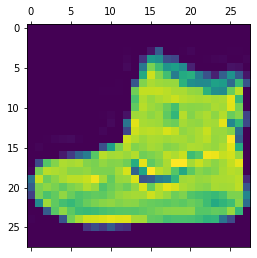

In [8]:
# Na druhu stranu, kniznica matplotlib ponuka funkciu matshow(), ktora dokaze
# zobrazit takuto maticu vo vizualne privetivejsom "grafe" a takymto sposobom
# uz vieme obrazok ovela lepsie identifikovat. Vidime, ze na prvom obrazku
# datasetu sa nachadza pravdepodobne topanka.

plt.matshow(x_train[0])

In [9]:
# Kedze klasifikacia bude prebiehat tak, ze k danemu obrazku bude priradene
# cislo / label od 0 - 9 (0 - tielko, 1 - nohavice, 2 - pulover, ...),
# mozme si prave k tomuto obrazku vypisat aj korespondujuce cislo / label,
# ktory sa samozrejme nachadza v mnozine y_train. Vidime, ze tato konkretna
# topanka, ma label 9

y_train[0]

9

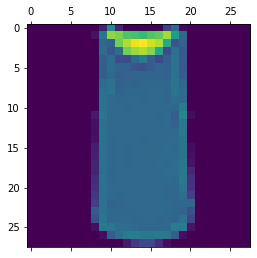

In [10]:
# Mozeme sa pozriet aj na ine obrazky podobnym sposobom

plt.matshow(x_train[2])

In [11]:
# Tento obrazok znazornuje tielko a jeho identifikacne cislo / label je 0

y_train[2]

0

In [12]:
# Normalizacia datasetu

x_train = x_train / 255
x_test = x_test / 255

In [13]:
x_train[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.16078431, 0.7372549 , 0.40392157, 0.21176471, 0.18823529,
        0.16862745, 0.34117647, 0.65882353, 0.52156863, 0.0627451 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.19215686, 0.53333333, 0.85882353,
        0.84705882, 0.89411765, 0.9254902 , 1.        , 1.        ,
        1.        , 1.        , 0.85098039, 0.84313725, 0.99607843,
        0.90588235, 0.62745098, 0.17647059, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05490196, 0.69019608, 0.87058824, 0.87843137, 0.83137255,
        0.79607843, 0.77647059, 0.76862745, 0.78431373, 0.84313725,
        0.8       , 0.7921

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [15]:
# Vytvorenie modelu a pridanie layerov

model = Sequential()

# Pridanie INPUT layer, Flatten konvertuje 2D pole na 1D pole
model.add(Flatten(input_shape = [28, 28]))

# Pridanie HIDDEN layer, specifikujeme nejaky pocet neuronov (subjektivne) a zaroven pridame aktivacnu funckiu
# V nasom pripade aktivacna funkcia bude 'relu'
model.add(Dense(20, activation = 'relu'))

# Pridanie OUPUT layer, bude ich 10, pretoze mame 10 kategorii oblecenia / moznych vysledkov
# Aktivacna funkcia softmax urobi distribuciu mnoziny cisel na mnozinu pravdepodobnosti
model.add(Dense(10, activation = 'softmax'))

In [16]:
# Model ma funkciu summary(), ktora nam ukaze, ako vyzera nasa neuronova siet
# V nasom pripade vidime, ze mame 784 INPUT neuronov, 20 HIDDEN neuronov a 10 OUTPUT neuronov - OUTPUT SHAPE

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 20)                15700     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Model skompilujeme a pripravime na trenovanie
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [18]:
# Trenovanie a evalvacia modelu
def evalvacia_modelu(x_data, y_data, n_folds=5):
    # Vytvorenie poli pre evidenciu presnosti a erroru
    skore, historie = list(), list()
    
    # Pouzitie metody cross-validation aby sa predoslo overfittingu. Pri tejto metode sa rozdelia trenovacie data do
    # viacerych skupin a podla vybraneho modelu (v nasom pripade k-fold) sa pouziju. Pri k-fold sa rozdelia trenovacie
    # data do K skupin a vzdy sa pouzije K-1 skupin na trening a 1 skupina na validaciu daneho setu. Postupne sa
    # iteruje az pokial sa ako validacna skupina nepouziju vsetky skupiny.
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    
    # Iterujeme cez skupiny ktore boli definovane metodou k-fold
    for train_ix, test_ix in kfold.split(x_data):
        # Vyberieme riadky pre trenovanie a riadky pre testovanie
        trainX, trainY, testX, testY = x_data[train_ix], y_data[train_ix], x_data[test_ix], y_data[test_ix]
        
        # Nafitujeme model s danymi riadkami
        # V nasom pripade sme si dali 10 epoch
        # Batch size 32, aby trenovanie neprebiehalo priliz dlho
        # na validation_data overime aky error / stratu momentalne mame
        # verbose 1 nam vypise detailnejsie priebeh trenovanie v kazdej epoche
        historia = model.fit(trainX, trainY, epochs=5, batch_size=32, validation_data=(testX, testY), verbose=1)
        
        # Evalvujeme model po kazdej iteracii vypiseme aktualnu presnost v percentach
        _, acc = model.evaluate(testX, testY, verbose=0)
        print('> %.3f' % (acc * 100.0))
        
        # Zapiseme aktualne presnosti a error
        skore.append(acc)
        historie.append(historia)
    return skore, historie

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.7870 - accuracy: 0.7314 - val_loss: 0.4694 - val_accuracy: 0.8372
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4414 - accuracy: 0.8448 - val_loss: 0.4149 - val_accuracy: 0.8522
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3995 - accuracy: 0.8595 - val_loss: 0.4010 - val_accuracy: 0.8601
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3823 - accuracy: 0.8639 - val_loss: 0.3925 - val_accuracy: 0.8593
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3673 - accuracy: 0.8694 - val_loss: 0.3690 - val_accuracy: 0.8698
> 86.975
Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3577 - accuracy: 0.8726 - val_loss: 0.3497 - val_accuracy: 0.8731
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3474 - accuracy: 0.8757 - val_loss: 0.3401 - val_accurac

<ipython-input-19-bf535c849d64>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(211)
<ipython-input-19-bf535c849d64>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(212)


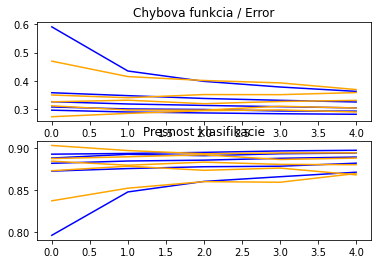

Celkova presnost: stredna hodnota=88.015 standardna odchylka=1.019, n=5


In [19]:
# plot diagnostic learning curves
def sumarizacia_diagnostiky_siete(historie):
    for i in range(len(historie)):
        
        # Vykreslenie grafu pre chybovu funkciu / error
        plt.subplot(211)
        plt.title('Chybova funkcia / Error')
        
        # Hodnota chybovej funkcie pre trenovacie data
        plt.plot(historie[i].history['loss'], color='blue', label='train')
        
        # Hodnota chybovej funkcie pre validacne data
        plt.plot(historie[i].history['val_loss'], color='orange', label='test')
        
        # Vykreslenie grafu pre hodnoty presnosti
        plt.subplot(212)
        plt.title('Presnost klasifikacie')
        
        # Hodnota presnosti pre validacne data
        plt.plot(historie[i].history['accuracy'], color='blue', label='train')
        
        # Hodnota presnosti pre validacne data
        plt.plot(historie[i].history['val_accuracy'], color='orange', label='test')
    plt.show()

# Samotna evalvacia modelu
skore, historie = evalvacia_modelu(x_train, y_train)

# Sumarizacia a vykreslenie kriviek presnosti a chyby v grafoch
sumarizacia_diagnostiky_siete(historie)

print('Celkova presnost: stredna hodnota=%.3f standardna odchylka=%.3f, n=%d' % (mean(skore)*100, std(skore)*100, len(skore)))

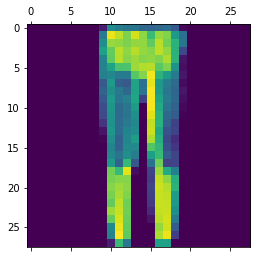

In [23]:
# Vo prvom vykreslenom grafe vyssie mame 5 modrych kriviek (modra -> hodnota chyby pre trenovacie data) a
# (zelena -> hodnota chyby pre validacne data) a mozeme vidiet ako po kazdej skupine (5 skupin - KFold) bola chybovost
# nizzia a nizzia a klesala
# V druhom grafe pod nim farebne analogicky mozeme vidiet ako nam presnost pre trenovacie data a validacne data v jednotlivych
# skupinach neustala narastala - az sme sa dostali na 89.442% presnosti (0.89442), kde sme nasledne vypocitali mean
# (strednu hodnotu) a teda v priemere bola presnost po vsetkych iteraciach skupin 88.015%

# Teraz chceme otestovat presnost a funkcnost nasej neuronovej siete, a preto skusime predikovat nahodne vybrany obrazok
# z testovacej mnoziny a pozrieme sa, ku ktorej kategorii oblecenia sa najviac priblizuje (ktora ma najvacsiu presnost)

plt.matshow(x_test[3])

# Zo subjektivneho pohladu vidime, ze sa jedna o nohavice

In [24]:
# Pouzijeme funkciu predict ktorou disponuje model a ako parameter vlozime
# nasu testovaciu mnozinu dat, ktora sa cela vyhodnoti a nasledne si z nej
# mozeme vybrat konkretny obrazok, pri ktorom chceme zistit jeho klasifikaciu
# do jednej z kategorii oblecenia
yp = model.predict(x_test)

In [25]:
# Vypiseme pravdepodobnosti / presnosti vyhodnotenia jednotlivych
# kategorii oblecenia - je to pole, ktore obsahuje 10 cisel - 10 kategorii
# oblecenia, kde indexy tychto cisel v poli znamenaju ciselny label oblecenia

#0   Tielko
#1   Nohavice
#2   Pulover
#3   Saty
#4   Kabat
#5   Sandale
#6   Tricko
#7   Sneaker
#8   Taska
#9   Cizmy

yp[3]

# Kedze prvky v poli sa indexuju od 0-9, tak mozeme vidiet, ze najvyssie
# cislo je hned druhe v poradi (index 1). Ked sa nasledne pozrieme vyssie
# kde su vypisane ciselne oznacenia konkretnych typov oblecenia, zistime,
# ze index 1 su nohavice. Cize to znamena, ze neuronova siet vyhodnotila,
# ze obrazok ktory sme jej dali su najviac pravdepodobne nohavice cca 99%

array([6.6391419e-07, 9.9998188e-01, 5.1825407e-07, 1.6283051e-05,
       6.3108547e-07, 1.2688894e-13, 5.7479776e-09, 2.2912479e-19,
       1.9889626e-08, 2.0071405e-12], dtype=float32)

In [26]:
# Aby sme to videli lepsie, mozeme si vypisat na ktorom indexe sa nachadza
# najvyssie cislo a vidime, ze je to prave na 1. indexe

np.argmax(yp[3])

1

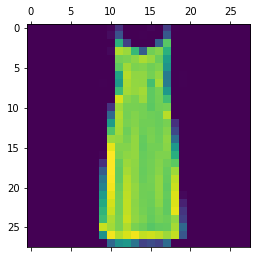

In [28]:
# Mozeme to vyskusat na viacerych kusoch oblecenia.
plt.matshow(x_test[13])

# Na prvy pohlad su to saty

In [29]:
# A vidime, ze index s najvyssim cislom je index c. 3, co naozaj su saty

np.argmax(yp[13])

3